In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [7]:
def bias(y, z):
    return - 2 * (z - y)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            z_train = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы, начиная со второго, обучаем на сдвиг
            tree.fit(X_train, bias(y_train, z_train))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.5

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [10]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

In [11]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1095
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 4845


In [12]:
import matplotlib.pyplot as plt

In [13]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

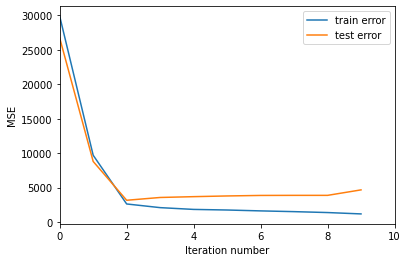

eta = 0.5; depth = 3


In [15]:
get_error_plot(n_trees, train_errors, test_errors)
print(f'eta = {eta}; depth = {max_depth}')

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2519
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3256


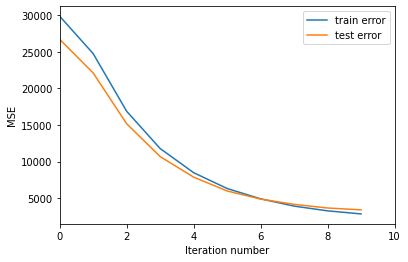

eta = 0.1; depth = 3


In [16]:
# Максимальная глубина деревьев
max_depth = 3
# Шаг
eta = 0.1
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)
print(f'eta = {eta}; depth = {max_depth}')

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 6281
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 5836


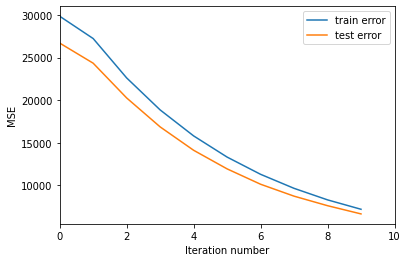

eta = 0.05; depth = 3


In [17]:
# Максимальная глубина деревьев
max_depth = 3
# Шаг
eta = 0.05
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)
print(f'eta = {eta}; depth = {max_depth}')

Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2519
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3256


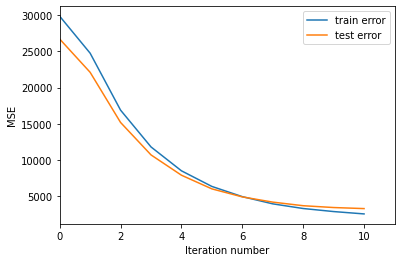

eta = 0.1; depth = 3


In [28]:
# Максимальная глубина деревьев
max_depth = 3
# Шаг
eta = 0.1
n_trees = 11
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)
print(f'eta = {eta}; depth = {max_depth}')

In [30]:
md = [3,5,7,10]
et = [0.01,0.05,0.1,0.5,1]
#nn_trees = [5,10,30,50,100]
nn_trees = [3,5,7,9,10,11]
for max_depth in md:
   for eta in et:
       for n_trees in nn_trees:
            print(f'eta = {eta}; depth = {max_depth}; n_trees = {n_trees}')
            trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
            evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
            #get_error_plot(n_trees, train_errors, test_errors)
            print(f'eta = {eta}; depth = {max_depth}')

eta = 0.01; depth = 3; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 27284
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 24407
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 25390
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 22713
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 23642
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 21157
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 22028
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 19687
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 10
Ошибка алгоритма из 10 дерев

In [ ]:
'''
eta = 0.01; depth = 3; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 27284
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 24407
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 25390
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 22713
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 23642
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 21157
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 22028
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 19687
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 21268
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 19021
eta = 0.01; depth = 3
eta = 0.01; depth = 3; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.01 на тренировочной выборке: 21268
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.01 на тестовой выборке: 19021
eta = 0.01; depth = 3
eta = 0.05; depth = 3; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 18856
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 16860
eta = 0.05; depth = 3
eta = 0.05; depth = 3; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 13311
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 11925
eta = 0.05; depth = 3
eta = 0.05; depth = 3; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 9636
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 8717
eta = 0.05; depth = 3
eta = 0.05; depth = 3; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 7176
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 6630
eta = 0.05; depth = 3
eta = 0.05; depth = 3; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 6281
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 5836
eta = 0.05; depth = 3
eta = 0.05; depth = 3; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.05 на тренировочной выборке: 6281
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.05 на тестовой выборке: 5836
eta = 0.05; depth = 3
eta = 0.1; depth = 3; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 11786
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 10683
eta = 0.1; depth = 3
eta = 0.1; depth = 3; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 6321
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 5983
eta = 0.1; depth = 3
eta = 0.1; depth = 3; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 3911
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 4152
eta = 0.1; depth = 3
eta = 0.1; depth = 3; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2845
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3402
eta = 0.1; depth = 3
eta = 0.1; depth = 3; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2519
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3256
eta = 0.1; depth = 3
eta = 0.1; depth = 3; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2519
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3256
eta = 0.1; depth = 3
eta = 0.5; depth = 3; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 2089
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 3563
eta = 0.5; depth = 3
eta = 0.5; depth = 3; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1744
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 3784
eta = 0.5; depth = 3
eta = 0.5; depth = 3; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1507
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 3871
eta = 0.5; depth = 3
eta = 0.5; depth = 3; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1177
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 4665
eta = 0.5; depth = 3
eta = 0.5; depth = 3; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1095
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 4845
eta = 0.5; depth = 3
eta = 0.5; depth = 3; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.5 на тренировочной выборке: 1095
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 0.5 на тестовой выборке: 4845
eta = 0.5; depth = 3
eta = 1; depth = 3; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2965
Ошибка алгоритма из 3 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7061
eta = 1; depth = 3
eta = 1; depth = 3; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2965
Ошибка алгоритма из 5 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7853
eta = 1; depth = 3
eta = 1; depth = 3; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2965
Ошибка алгоритма из 7 деревьев глубиной 3     с шагом 1 на тестовой выборке: 8856
eta = 1; depth = 3
eta = 1; depth = 3; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2965
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 1 на тестовой выборке: 8423
eta = 1; depth = 3
eta = 1; depth = 3; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2965
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7387
eta = 1; depth = 3
eta = 1; depth = 3; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 2965
Ошибка алгоритма из 11 деревьев глубиной 3     с шагом 1 на тестовой выборке: 7387
eta = 1; depth = 3
eta = 0.01; depth = 5; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 27185
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 24346
eta = 0.01; depth = 5
eta = 0.01; depth = 5; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 25213
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 22692
eta = 0.01; depth = 5
eta = 0.01; depth = 5; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 23391
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 21111
eta = 0.01; depth = 5
eta = 0.01; depth = 5; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 21717
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 19660
eta = 0.01; depth = 5
eta = 0.01; depth = 5; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 20931
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 18984
eta = 0.01; depth = 5
eta = 0.01; depth = 5; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 0.01 на тренировочной выборке: 20931
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 0.01 на тестовой выборке: 18984
eta = 0.01; depth = 5
eta = 0.05; depth = 5; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 18446
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 17026
eta = 0.05; depth = 5
eta = 0.05; depth = 5; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 12679
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 12093
eta = 0.05; depth = 5
eta = 0.05; depth = 5; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 8855
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 8862
eta = 0.05; depth = 5
eta = 0.05; depth = 5; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 6299
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 6877
eta = 0.05; depth = 5
eta = 0.05; depth = 5; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 5332
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 6121
eta = 0.05; depth = 5
eta = 0.05; depth = 5; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 0.05 на тренировочной выборке: 5332
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 0.05 на тестовой выборке: 6121
eta = 0.05; depth = 5
eta = 0.1; depth = 5; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 11075
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 10613
eta = 0.1; depth = 5
eta = 0.1; depth = 5; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 5396
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 6074
eta = 0.1; depth = 5
eta = 0.1; depth = 5; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 2833
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 4412
eta = 0.1; depth = 5
eta = 0.1; depth = 5; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 1678
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3737
eta = 0.1; depth = 5
eta = 0.1; depth = 5; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 1320
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3748
eta = 0.1; depth = 5
eta = 0.1; depth = 5; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 1320
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3748
eta = 0.1; depth = 5
eta = 0.5; depth = 5; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.5 на тренировочной выборке: 1077
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.5 на тестовой выборке: 3698
eta = 0.5; depth = 5
eta = 0.5; depth = 5; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.5 на тренировочной выборке: 633
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.5 на тестовой выборке: 4771
eta = 0.5; depth = 5
eta = 0.5; depth = 5; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.5 на тренировочной выборке: 387
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 0.5 на тестовой выборке: 5417
eta = 0.5; depth = 5
eta = 0.5; depth = 5; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.5 на тренировочной выборке: 237
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.5 на тестовой выборке: 5798
eta = 0.5; depth = 5
eta = 0.5; depth = 5; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.5 на тренировочной выборке: 144
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.5 на тестовой выборке: 5928
eta = 0.5; depth = 5
eta = 0.5; depth = 5; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 0.5 на тренировочной выборке: 144
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 0.5 на тестовой выборке: 5928
eta = 0.5; depth = 5
eta = 1; depth = 5; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 1894
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 1 на тестовой выборке: 5824
eta = 1; depth = 5
eta = 1; depth = 5; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 1894
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6163
eta = 1; depth = 5
eta = 1; depth = 5; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 1894
Ошибка алгоритма из 7 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6282
eta = 1; depth = 5
eta = 1; depth = 5; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 1894
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6627
eta = 1; depth = 5
eta = 1; depth = 5; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 1894
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6628
eta = 1; depth = 5
eta = 1; depth = 5; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 1894
Ошибка алгоритма из 11 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6628
eta = 1; depth = 5
eta = 0.01; depth = 7; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 27095
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 24362
eta = 0.01; depth = 7
eta = 0.01; depth = 7; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 25071
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 22683
eta = 0.01; depth = 7
eta = 0.01; depth = 7; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 23187
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 21203
eta = 0.01; depth = 7
eta = 0.01; depth = 7; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 21450
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 19837
eta = 0.01; depth = 7
eta = 0.01; depth = 7; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 20632
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 19153
eta = 0.01; depth = 7
eta = 0.01; depth = 7; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 0.01 на тренировочной выборке: 20632
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 0.01 на тестовой выборке: 19153
eta = 0.01; depth = 7
eta = 0.05; depth = 7; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 18057
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 17110
eta = 0.05; depth = 7
eta = 0.05; depth = 7; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 12106
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 12303
eta = 0.05; depth = 7
eta = 0.05; depth = 7; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 8150
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 9190
eta = 0.05; depth = 7
eta = 0.05; depth = 7; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 5516
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 7218
eta = 0.05; depth = 7
eta = 0.05; depth = 7; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 4546
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 6532
eta = 0.05; depth = 7
eta = 0.05; depth = 7; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 0.05 на тренировочной выборке: 4546
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 0.05 на тестовой выборке: 6532
eta = 0.05; depth = 7
eta = 0.1; depth = 7; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 10449
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 10947
eta = 0.1; depth = 7
eta = 0.1; depth = 7; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 4607
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 6417
eta = 0.1; depth = 7
eta = 0.1; depth = 7; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 2143
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4791
eta = 0.1; depth = 7
eta = 0.1; depth = 7; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 1040
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4159
eta = 0.1; depth = 7
eta = 0.1; depth = 7; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 743
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4033
eta = 0.1; depth = 7
eta = 0.1; depth = 7; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 743
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4033
eta = 0.1; depth = 7
eta = 0.5; depth = 7; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.5 на тренировочной выборке: 388
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 0.5 на тестовой выборке: 4448
eta = 0.5; depth = 7
eta = 0.5; depth = 7; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.5 на тренировочной выборке: 64
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 0.5 на тестовой выборке: 4847
eta = 0.5; depth = 7
eta = 0.5; depth = 7; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.5 на тренировочной выборке: 17
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 0.5 на тестовой выборке: 5005
eta = 0.5; depth = 7
eta = 0.5; depth = 7; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.5 на тренировочной выборке: 4
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 0.5 на тестовой выборке: 4992
eta = 0.5; depth = 7
eta = 0.5; depth = 7; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.5 на тренировочной выборке: 3
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.5 на тестовой выборке: 4974
eta = 0.5; depth = 7
eta = 0.5; depth = 7; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 0.5 на тренировочной выборке: 3
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 0.5 на тестовой выборке: 4974
eta = 0.5; depth = 7
eta = 1; depth = 7; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 995
Ошибка алгоритма из 3 деревьев глубиной 7     с шагом 1 на тестовой выборке: 7718
eta = 1; depth = 7
eta = 1; depth = 7; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 995
Ошибка алгоритма из 5 деревьев глубиной 7     с шагом 1 на тестовой выборке: 8415
eta = 1; depth = 7
eta = 1; depth = 7; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 995
Ошибка алгоритма из 7 деревьев глубиной 7     с шагом 1 на тестовой выборке: 8922
eta = 1; depth = 7
eta = 1; depth = 7; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 995
Ошибка алгоритма из 9 деревьев глубиной 7     с шагом 1 на тестовой выборке: 9218
eta = 1; depth = 7
eta = 1; depth = 7; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 995
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 1 на тестовой выборке: 7857
eta = 1; depth = 7
eta = 1; depth = 7; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 1 на тренировочной выборке: 995
Ошибка алгоритма из 11 деревьев глубиной 7     с шагом 1 на тестовой выборке: 7857
eta = 1; depth = 7
eta = 0.01; depth = 10; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 0.01 на тренировочной выборке: 27024
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 0.01 на тестовой выборке: 24320
eta = 0.01; depth = 10
eta = 0.01; depth = 10; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 0.01 на тренировочной выборке: 24946
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 0.01 на тестовой выборке: 22596
eta = 0.01; depth = 10
eta = 0.01; depth = 10; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 0.01 на тренировочной выборке: 23029
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 0.01 на тестовой выборке: 21022
eta = 0.01; depth = 10
eta = 0.01; depth = 10; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 0.01 на тренировочной выборке: 21262
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 0.01 на тестовой выборке: 19575
eta = 0.01; depth = 10
eta = 0.01; depth = 10; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 0.01 на тренировочной выборке: 20427
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 0.01 на тестовой выборке: 18914
eta = 0.01; depth = 10
eta = 0.01; depth = 10; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 0.01 на тренировочной выборке: 20427
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 0.01 на тестовой выборке: 18914
eta = 0.01; depth = 10
eta = 0.05; depth = 10; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 0.05 на тренировочной выборке: 17787
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 0.05 на тестовой выборке: 16794
eta = 0.05; depth = 10
eta = 0.05; depth = 10; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 0.05 на тренировочной выборке: 11713
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 0.05 на тестовой выборке: 12018
eta = 0.05; depth = 10
eta = 0.05; depth = 10; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 0.05 на тренировочной выборке: 7722
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 0.05 на тестовой выборке: 9046
eta = 0.05; depth = 10
eta = 0.05; depth = 10; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 0.05 на тренировочной выборке: 5092
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 0.05 на тестовой выборке: 7187
eta = 0.05; depth = 10
eta = 0.05; depth = 10; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 0.05 на тренировочной выборке: 4140
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 0.05 на тестовой выборке: 6545
eta = 0.05; depth = 10
eta = 0.05; depth = 10; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 0.05 на тренировочной выборке: 4140
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 0.05 на тестовой выборке: 6545
eta = 0.05; depth = 10
eta = 0.1; depth = 10; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 10038
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 10543
eta = 0.1; depth = 10
eta = 0.1; depth = 10; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 4166
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 6510
eta = 0.1; depth = 10
eta = 0.1; depth = 10; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 1740
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4989
eta = 0.1; depth = 10
eta = 0.1; depth = 10; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 718
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4533
eta = 0.1; depth = 10
eta = 0.1; depth = 10; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 462
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4446
eta = 0.1; depth = 10
eta = 0.1; depth = 10; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 462
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 0.1 на тестовой выборке: 4446
eta = 0.1; depth = 10
eta = 0.5; depth = 10; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 0.5 на тренировочной выборке: 3
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 0.5 на тестовой выборке: 4182
eta = 0.5; depth = 10
eta = 0.5; depth = 10; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 0.5 на тренировочной выборке: 0
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 0.5 на тестовой выборке: 4171
eta = 0.5; depth = 10
eta = 0.5; depth = 10; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 0.5 на тренировочной выборке: 0
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 0.5 на тестовой выборке: 4173
eta = 0.5; depth = 10
eta = 0.5; depth = 10; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 0.5 на тренировочной выборке: 0
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 0.5 на тестовой выборке: 4173
eta = 0.5; depth = 10
eta = 0.5; depth = 10; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 0.5 на тренировочной выборке: 0
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 0.5 на тестовой выборке: 4173
eta = 0.5; depth = 10
eta = 0.5; depth = 10; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 0.5 на тренировочной выборке: 0
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 0.5 на тестовой выборке: 4173
eta = 0.5; depth = 10
eta = 1; depth = 10; n_trees = 3
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 1 на тренировочной выборке: 246
Ошибка алгоритма из 3 деревьев глубиной 10     с шагом 1 на тестовой выборке: 5693
eta = 1; depth = 10
eta = 1; depth = 10; n_trees = 5
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 1 на тренировочной выборке: 246
Ошибка алгоритма из 5 деревьев глубиной 10     с шагом 1 на тестовой выборке: 7864
eta = 1; depth = 10
eta = 1; depth = 10; n_trees = 7
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 1 на тренировочной выборке: 246
Ошибка алгоритма из 7 деревьев глубиной 10     с шагом 1 на тестовой выборке: 10660
eta = 1; depth = 10
eta = 1; depth = 10; n_trees = 9
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 1 на тренировочной выборке: 246
Ошибка алгоритма из 9 деревьев глубиной 10     с шагом 1 на тестовой выборке: 12006
eta = 1; depth = 10
eta = 1; depth = 10; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 1 на тренировочной выборке: 246
Ошибка алгоритма из 10 деревьев глубиной 10     с шагом 1 на тестовой выборке: 12267
eta = 1; depth = 10
eta = 1; depth = 10; n_trees = 11
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 1 на тренировочной выборке: 246
Ошибка алгоритма из 11 деревьев глубиной 10     с шагом 1 на тестовой выборке: 12267
eta = 1; depth = 10

'''

In [ ]:
'''
Выводы:
1. При росте числа деревьев до 10 - повышение точности предсказаний имеет место, больше 10 точность не растет (возможно ограничеие или ошибка алгоритма)
2. При увеличении глубины больше 3-х появляются признаки переобучения (на 5 слабо выраженные), на 7 и более значительное переобучение
3. При уменьшении eta от 0.5 к 0.1 точность предсказаний растет, при дальнейшем уменьшении, алгоритм не успевает сойтись

Оптимальные значения:
eta = 0.1; depth = 3; n_trees = 10
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2519
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3256
'''